In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [3]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [4]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [5]:
car_sales.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
len(car_sales)

1000

In [7]:
car_sales.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [8]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [9]:
car_sales[car_sales["Make"] == "BMW"]

,Make,Colour,Odometer (KM),Doors,Price
1,BMW,Blue,192714.0,5.0,19943.0
17,BMW,White,194189.0,5.0,17177.0
55,BMW,White,79937.0,5.0,48686.0
57,BMW,Red,162176.0,5.0,19186.0
60,BMW,Red,208124.0,5.0,24668.0
...,...,...,...,...,...
967,BMW,Green,26839.0,5.0,15224.0
969,BMW,Blue,45207.0,5.0,35254.0
971,BMW,Black,178164.0,3.0,24891.0
978,BMW,White,85739.0,5.0,48419.0


In [10]:
car_sales[car_sales["Odometer (KM)"] > 200000]

,Make,Colour,Odometer (KM),Doors,Price
15,Toyota,Blue,205592.0,4.0,16290.0
19,Nissan,Blue,215820.0,4.0,6010.0
32,Nissan,White,203795.0,4.0,9330.0
42,Honda,Black,200490.0,4.0,6337.0
44,Toyota,Blue,213893.0,4.0,5743.0
...,...,...,...,...,...
987,Honda,White,215235.0,4.0,3825.0
988,Nissan,Black,248736.0,4.0,8358.0
991,Honda,Blue,235985.0,4.0,9184.0
998,Honda,White,215883.0,4.0,4001.0


In [11]:
car_sales[car_sales["Price"] > 30000]

,Make,Colour,Odometer (KM),Doors,Price
16,Toyota,Red,96742.0,4.0,34465.0
55,BMW,White,79937.0,5.0,48686.0
69,BMW,White,37513.0,5.0,32379.0
89,NaN,Blue,90249.0,4.0,35988.0
115,Toyota,Black,20714.0,4.0,30407.0
...,...,...,...,...,...
969,BMW,Blue,45207.0,5.0,35254.0
978,BMW,White,85739.0,5.0,48419.0
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0


In [12]:
car_sales[car_sales["Price"] < 6000]

,Make,Colour,Odometer (KM),Doors,Price
44,Toyota,Blue,213893.0,4.0,5743.0
45,Nissan,Blue,231057.0,4.0,5925.0
64,Toyota,White,170085.0,4.0,5383.0
72,Honda,White,NaN,4.0,5648.0
83,Toyota,Blue,248447.0,4.0,5708.0
...,...,...,...,...,...
984,Nissan,Blue,157235.0,4.0,4196.0
987,Honda,White,215235.0,4.0,3825.0
993,Nissan,Black,162523.0,4.0,4696.0
996,NaN,White,155144.0,3.0,5716.0


In [13]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3.0,4.0,5.0
Make,,,
BMW,21,0,72
Honda,0,276,0
Nissan,38,137,0
Toyota,0,359,0


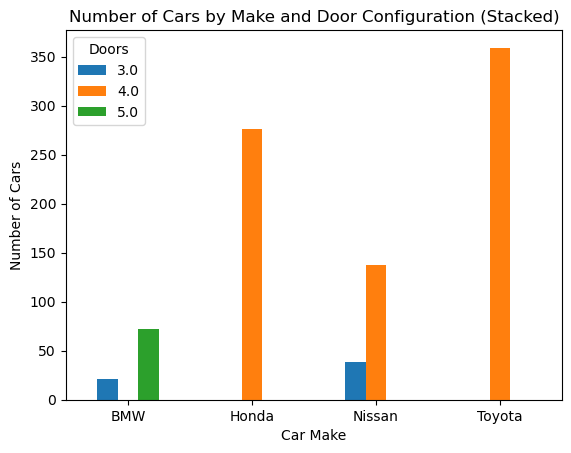

In [14]:
pd.crosstab(car_sales["Make"], car_sales["Doors"]).plot(kind='bar', stacked=False)
plt.xlabel("Car Make")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Make and Door Configuration (Stacked)")
plt.legend(title="Doors")
plt.xticks(rotation=0)
plt.show()

In [15]:
car_sales.groupby(["Make"]).mean(numeric_only=True).drop(["Doors"], axis=1)

,Odometer (KM),Price
Make,,
BMW,127491.439560,26902.440860
Honda,125233.374101,14618.661922
Nissan,136809.029070,13664.502857
Toyota,135942.582873,15715.257062


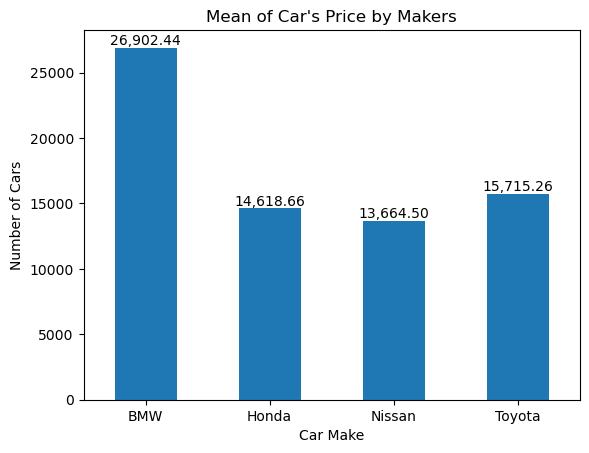

In [16]:
car_sales.groupby(["Make"]).mean(numeric_only=True)["Price"].plot(kind='bar')
plt.xlabel("Car Make")
plt.ylabel("Number of Cars")
plt.title("Mean of Car's Price by Makers")
plt.xticks(rotation=0)

for bar in plt.gca().containers[0]:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.2f}", ha='center', va='bottom')

plt.show()

<Axes: >

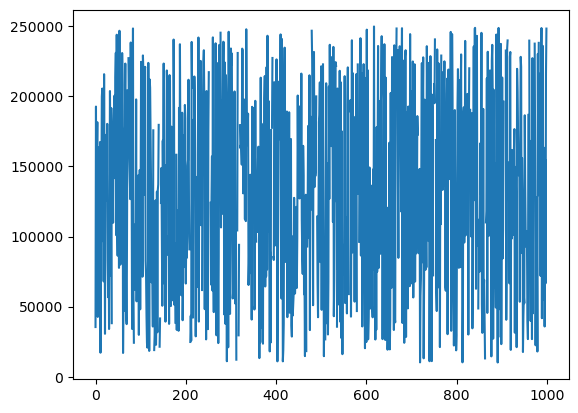

In [17]:
car_sales["Odometer (KM)"].plot()


<Axes: >

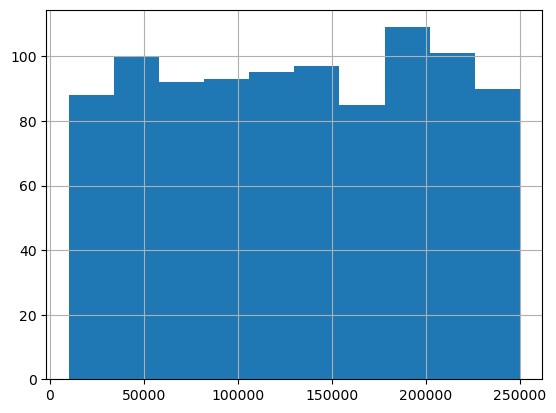

In [18]:
car_sales["Odometer (KM)"].hist()


In [19]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


## Manipulating Data

In [20]:
car_sales["Make"] = car_sales["Make"].str.lower()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,honda,White,35431.0,4.0,15323.0
1,bmw,Blue,192714.0,5.0,19943.0
2,honda,White,84714.0,4.0,28343.0
3,toyota,White,154365.0,4.0,13434.0
4,nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,nissan,Blue,66604.0,4.0,31570.0
998,honda,White,215883.0,4.0,4001.0


In [26]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean())
car_sales[car_sales["Odometer (KM)"].isna()]

,Make,Colour,Odometer (KM),Doors,Price


In [32]:
car_sales_clean = car_sales.dropna()
car_sales_clean

,Make,Colour,Odometer (KM),Doors,Price
0,honda,White,35431.0,4.0,15323.0
1,bmw,Blue,192714.0,5.0,19943.0
2,honda,White,84714.0,4.0,28343.0
3,toyota,White,154365.0,4.0,13434.0
4,nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
994,bmw,Blue,163322.0,3.0,31666.0
995,toyota,Black,35820.0,4.0,32042.0
997,nissan,Blue,66604.0,4.0,31570.0
998,honda,White,215883.0,4.0,4001.0


In [35]:
def assign_seats(doors):
  if doors == 3:
    return 2
  else:
    return 5

car_sales["Seats"] = car_sales["Doors"].apply(assign_seats)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,honda,White,35431.0,4.0,15323.0,5
1,bmw,Blue,192714.0,5.0,19943.0,5
2,honda,White,84714.0,4.0,28343.0,5
3,toyota,White,154365.0,4.0,13434.0,5
4,nissan,Blue,181577.0,3.0,14043.0,2
...,...,...,...,...,...,...
995,toyota,Black,35820.0,4.0,32042.0,5
996,NaN,White,155144.0,3.0,5716.0,2
997,nissan,Blue,66604.0,4.0,31570.0,5
998,honda,White,215883.0,4.0,4001.0,5


In [36]:
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5] * 100
car_sales["Fuel per 100KM"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,honda,White,35431.0,4.0,15323.0,5,7.5
1,bmw,Blue,192714.0,5.0,19943.0,5,9.2
2,honda,White,84714.0,4.0,28343.0,5,5.0
3,toyota,White,154365.0,4.0,13434.0,5,9.6
4,nissan,Blue,181577.0,3.0,14043.0,2,8.7
...,...,...,...,...,...,...,...
995,toyota,Black,35820.0,4.0,32042.0,5,4.7
996,NaN,White,155144.0,3.0,5716.0,2,7.6
997,nissan,Blue,66604.0,4.0,31570.0,5,8.7
998,honda,White,215883.0,4.0,4001.0,5,3.0


In [37]:
car_sales["Total fuel used (L)"] = car_sales["Odometer (KM)"]/100 * car_sales["Fuel per 100KM"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,honda,White,35431.0,4.0,15323.0,5,7.5,2657.325
1,bmw,Blue,192714.0,5.0,19943.0,5,9.2,17729.688
2,honda,White,84714.0,4.0,28343.0,5,5.0,4235.700
3,toyota,White,154365.0,4.0,13434.0,5,9.6,14819.040
4,nissan,Blue,181577.0,3.0,14043.0,2,8.7,15797.199
...,...,...,...,...,...,...,...,...
995,toyota,Black,35820.0,4.0,32042.0,5,4.7,1683.540
996,NaN,White,155144.0,3.0,5716.0,2,7.6,11790.944
997,nissan,Blue,66604.0,4.0,31570.0,5,8.7,5794.548
998,honda,White,215883.0,4.0,4001.0,5,3.0,6476.490


In [39]:
car_sales["Passed road saftey"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Passed road saftey
0,honda,White,35431.0,4.0,15323.0,5,7.5,2657.325,True
1,bmw,Blue,192714.0,5.0,19943.0,5,9.2,17729.688,True
2,honda,White,84714.0,4.0,28343.0,5,5.0,4235.700,True
3,toyota,White,154365.0,4.0,13434.0,5,9.6,14819.040,True
4,nissan,Blue,181577.0,3.0,14043.0,2,8.7,15797.199,True
...,...,...,...,...,...,...,...,...,...
995,toyota,Black,35820.0,4.0,32042.0,5,4.7,1683.540,True
996,NaN,White,155144.0,3.0,5716.0,2,7.6,11790.944,True
997,nissan,Blue,66604.0,4.0,31570.0,5,8.7,5794.548,True
998,honda,White,215883.0,4.0,4001.0,5,3.0,6476.490,True


In [40]:
car_sales["Odometer (Miles)"] = car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Passed road saftey,Odometer (Miles)
0,honda,White,35431.0,4.0,15323.0,5,7.5,2657.325,True,22144.375
1,bmw,Blue,192714.0,5.0,19943.0,5,9.2,17729.688,True,120446.250
2,honda,White,84714.0,4.0,28343.0,5,5.0,4235.700,True,52946.250
3,toyota,White,154365.0,4.0,13434.0,5,9.6,14819.040,True,96478.125
4,nissan,Blue,181577.0,3.0,14043.0,2,8.7,15797.199,True,113485.625
...,...,...,...,...,...,...,...,...,...,...
995,toyota,Black,35820.0,4.0,32042.0,5,4.7,1683.540,True,22387.500
996,NaN,White,155144.0,3.0,5716.0,2,7.6,11790.944,True,96965.000
997,nissan,Blue,66604.0,4.0,31570.0,5,8.7,5794.548,True,41627.500
998,honda,White,215883.0,4.0,4001.0,5,3.0,6476.490,True,134926.875
